In [78]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [79]:
df1=pd.read_csv('./brand_unit_sales_2023.csv')  
df2=pd.read_csv('./brand_unit_sales_2_2023.csv')  

region_sales_df=pd.concat([df1, df2], ignore_index=True)
region_sales_df.head()

,jngBizCrtraYr,brandMnno,jnghdqrtrsMnno,acntgYr,indutyLclasNm,indutyMlsfcNm,areaNm,frcsCnt,fyerAvrgSlsAmtScopeVal,arFyerAvrgSlsAmtScopeVal
0,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),서울,21.0,37000~41000,900~1100
1,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),부산,18.0,31000~35000,840~930
2,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),대구,1.0,0,0
3,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),인천,9.0,43000~48000,1100~1300
4,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),광주,26.0,32000~36000,850~950


In [80]:
region_sales_df = region_sales_df.rename(columns={
    "jngBizCrtraYr": "기준연도",
    "brandMnno": "브랜드관리번호",
    "jnghdqrtrsMnno": "본사관리번호",
    "acntgYr": "회계연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "areaNm": "지역명",
    "frcsCnt": "가맹점수",
    "fyerAvrgSlsAmtScopeVal": "연평균매출범위",
    "arFyerAvrgSlsAmtScopeVal": "단위면적당연평균매출범위"
})


In [81]:
region_sales_df.shape

(112759, 10)

### 지역별 브랜드 현황 및 매출 정보

- 지역 단위로 브랜드별 가맹점 수 및 연평균 매출 범위 정보 제공

➤ 지역 분석 및 입지 기반 매출 추정에 활용


In [82]:
region_sales_df.head()

,기준연도,브랜드관리번호,본사관리번호,회계연도,업종대분류,업종중분류,지역명,가맹점수,연평균매출범위,단위면적당연평균매출범위
0,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),서울,21.0,37000~41000,900~1100
1,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),부산,18.0,31000~35000,840~930
2,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),대구,1.0,0,0
3,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),인천,9.0,43000~48000,1100~1300
4,2023,BRD_20080100006,JNG_000001,2022,서비스,교육 (외국어),광주,26.0,32000~36000,850~950


In [83]:
region_sales_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112759 entries, 0 to 112758
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준연도          112759 non-null  int64  
 1   브랜드관리번호       112759 non-null  object 
 2   본사관리번호        112759 non-null  object 
 3   회계연도          112759 non-null  int64  
 4   업종대분류         112759 non-null  object 
 5   업종중분류         112759 non-null  object 
 6   지역명           112759 non-null  object 
 7   가맹점수          107824 non-null  float64
 8   연평균매출범위       101459 non-null  object 
 9   단위면적당연평균매출범위  101428 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 8.6+ MB


###  브랜드 기본 정보
- 브랜드별 기본 식별 정보 및 본사 정보, 주요 취급 상품 등 포함

➤ 브랜드 구분의 기준 / 브랜드 매칭용 기준

In [84]:
brand_info_df=pd.read_csv('./brand_info_2023_full.csv')
brand_info_df.head()    

,jngBizCrtraYr,brandMnno,jnghdqrtrsMnno,brno,crno,jnghdqrtrsRprsvNm,brandNm,indutyLclasNm,indutyMlsfcNm,majrGdsNm,jngBizStrtDate,corpNm
0,2023,BRD_20080100006,JNG_000001,1208677976,1.101113e+12,김병일,잉글리쉬무무,서비스,교육 (외국어),영어학습 콘텐츠(초등영어),20050502.0,(주)잉글리쉬무무
1,2023,BRD_20080100007,JNG_000002,1148662046,1.101114e+12,"선장덕, 조성우",오피스넥스(officenex),도소매,기타도소매,"문구, 사무용품",20000816.0,(주)오피스넥스
2,2023,BRD_20212290,JNG_000002,1148662046,1.101114e+12,"선장덕, 조성우",빵꾸똥꾸 문구야!,도소매,기타도소매,문구,20211006.0,(주)오피스넥스
3,2023,BRD_20212291,JNG_000002,1148662046,1.101114e+12,"선장덕, 조성우",오피스25,도소매,기타도소매,"문구, 사무용품",NaN,(주)오피스넥스
4,2023,BRD_20220916,JNG_000002,1148662046,1.101114e+12,"선장덕, 조성우",문구야 사랑해,도소매,기타도소매,문구,20220930.0,(주)오피스넥스


In [85]:
brand_info_df = brand_info_df.rename(columns={
    "jngBizCrtraYr": "기준연도",
    "brandMnno": "브랜드관리번호",
    "jnghdqrtrsMnno": "본사관리번호",
    "brno": "사업자등록번호",
    "crno": "법인등록번호",
    "jnghdqrtrsRprsvNm": "대표자명",
    "brandNm": "브랜드명",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "majrGdsNm": "주요취급상품",
    "jngBizStrtDate": "가맹사업개시일",
    "corpNm": "법인명"
})

In [86]:
brand_info_df.head(3)

,기준연도,브랜드관리번호,본사관리번호,사업자등록번호,법인등록번호,대표자명,브랜드명,업종대분류,업종중분류,주요취급상품,가맹사업개시일,법인명
0,2023,BRD_20080100006,JNG_000001,1208677976,1.101113e+12,김병일,잉글리쉬무무,서비스,교육 (외국어),영어학습 콘텐츠(초등영어),20050502.0,(주)잉글리쉬무무
1,2023,BRD_20080100007,JNG_000002,1148662046,1.101114e+12,"선장덕, 조성우",오피스넥스(officenex),도소매,기타도소매,"문구, 사무용품",20000816.0,(주)오피스넥스
2,2023,BRD_20212290,JNG_000002,1148662046,1.101114e+12,"선장덕, 조성우",빵꾸똥꾸 문구야!,도소매,기타도소매,문구,20211006.0,(주)오피스넥스


In [87]:
brand_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11445 entries, 0 to 11444
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     11445 non-null  int64  
 1   브랜드관리번호  11445 non-null  object 
 2   본사관리번호   11445 non-null  object 
 3   사업자등록번호  11445 non-null  int64  
 4   법인등록번호   7428 non-null   float64
 5   대표자명     11445 non-null  object 
 6   브랜드명     11445 non-null  object 
 7   업종대분류    11445 non-null  object 
 8   업종중분류    11445 non-null  object 
 9   주요취급상품   10560 non-null  object 
 10  가맹사업개시일  6915 non-null   float64
 11  법인명      11445 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.0+ MB


In [88]:
brand_info_df['업종대분류'].value_counts()

업종대분류
외식     9222
서비스    1700
도소매     523
Name: count, dtype: int64

In [89]:
brand_info_df['업종중분류'].value_counts().sort_values(ascending=False)[:10]

업종중분류
한식        3371
기타 외식     1310
커피         814
치킨         624
분식         565
일식         487
주점         485
기타 서비스     456
기타도소매      365
중식         305
Name: count, dtype: int64

In [90]:
brand_info_df.pivot_table(index='업종대분류',columns='주요취급상품', aggfunc='count')

가맹사업개시일                            ... 업종중분류                       
주요취급상품 (내장)칼국수 (도시락 등)밀키트제품판매 (만화시청) 서비스  ... 흑염소요리 흰죽 등 히츠마부시, 우나쥬, 스케이크동
업종대분류                                     ...                             
도소매        NaN            NaN        NaN  ...   NaN  NaN               NaN
서비스        NaN            NaN        0.0  ...   NaN  NaN               NaN
외식         0.0            0.0        NaN  ...   2.0  1.0               1.0

[3 rows x 56270 columns]

In [91]:
brand_info_df['주요취급상품'].value_counts().sort_values(ascending=False)[:10]

주요취급상품
커피      275
치킨      243
피자      129
떡볶이     125
돼지고기     95
국밥       61
족발       59
돈까스      58
삼겹살      54
곱창       51
Name: count, dtype: int64

### 가맹점 수 및 매출 등 운영 현황

- 브랜드별 연도별 가맹점 수, 계약 종료·해지 수, 평균 매출 정보

➤ 폐점 추정, 매출 기반 리스크 판단, 성장성 분석 등에 활용

In [92]:
brand_frcs_df=pd.read_csv('./brand_frcs_stats_2023_full.csv')  
brand_frcs_df.head()    

,yr,indutyLclasNm,indutyMlsfcNm,corpNm,brandNm,frcsCnt,newFrcsRgsCnt,ctrtEndCnt,ctrtCncltnCnt,nmChgCnt,avrgSlsAmt,arUnitAvrgSlsAmt
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0
3,2023,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0
4,2023,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0


In [93]:
brand_frcs_df = brand_frcs_df.rename(columns={
    "yr": "기준연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "corpNm": "법인명",
    "brandNm": "브랜드명",
    "frcsCnt": "가맹점수",
    "newFrcsRgsCnt": "신규가맹점등록수",
    "ctrtEndCnt": "계약만료수",
    "ctrtCncltnCnt": "계약해지수",
    "nmChgCnt": "상호변경수",
    "avrgSlsAmt": "연평균매출액",
    "arUnitAvrgSlsAmt": "단위면적당평균매출액"
})


In [94]:
brand_frcs_df.head(3)

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0


In [95]:
brand_frcs_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준연도        11167 non-null  int64 
 1   업종대분류       11167 non-null  object
 2   업종중분류       11167 non-null  object
 3   법인명         11167 non-null  object
 4   브랜드명        11167 non-null  object
 5   가맹점수        11167 non-null  int64 
 6   신규가맹점등록수    11167 non-null  int64 
 7   계약만료수       11167 non-null  int64 
 8   계약해지수       11167 non-null  int64 
 9   상호변경수       11167 non-null  int64 
 10  연평균매출액      11167 non-null  int64 
 11  단위면적당평균매출액  11167 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### 브랜드 창업비용 정보
- 브랜드별 창업 초기 비용 상세 항목

➤ 예산 기반 추천, 창업 리스크 분석에 활용

In [96]:
startup_cost_df=pd.read_csv('./brand_fntn_stats_2023.csv')  
startup_cost_df.head()   

,yr,indutyLclasNm,indutyMlsfcNm,brandNm,corpNm,jngBzmnJngAmt,jngBzmnEduAmt,jngBzmnAssrncAmt,jngBzmnEtcAmt,smtnAmt
0,2023,외식,한식,마미묵은지찜,㈜맘사랑,3300,2200,0,16896,22396
1,2023,외식,한식,마마쿡(MAMA COOK),(주)마마쿡,11000,0,20000,136199,167199
2,2023,외식,한식,마마부찌,마마부찌,5500,3300,5000,88000,101800
3,2023,외식,한식,마마리사,(주)마마리사,11000,5500,5000,72600,94100
4,2023,외식,한식,마린보이꼼장어하우스,마린보이유통,1100,2200,1000,75200,79500


In [97]:
startup_cost_df = startup_cost_df.rename(columns={
    "yr": "기준연도",
    "indutyLclasNm": "업종대분류",
    "indutyMlsfcNm": "업종중분류",
    "brandNm": "브랜드명",
    "corpNm": "법인명",
    "jngBzmnJngAmt": "보증금",
    "jngBzmnEduAmt": "교육비",
    "jngBzmnAssrncAmt": "보험료",
    "jngBzmnEtcAmt": "기타비용",
    "smtnAmt": "총창업비용"
})


In [98]:
startup_cost_df.head(3)

,기준연도,업종대분류,업종중분류,브랜드명,법인명,보증금,교육비,보험료,기타비용,총창업비용
0,2023,외식,한식,마미묵은지찜,㈜맘사랑,3300,2200,0,16896,22396
1,2023,외식,한식,마마쿡(MAMA COOK),(주)마마쿡,11000,0,20000,136199,167199
2,2023,외식,한식,마마부찌,마마부찌,5500,3300,5000,88000,101800


In [99]:
startup_cost_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준연도    11100 non-null  int64 
 1   업종대분류   11100 non-null  object
 2   업종중분류   11100 non-null  object
 3   브랜드명    11100 non-null  object
 4   법인명     11100 non-null  object
 5   보증금     11100 non-null  int64 
 6   교육비     11100 non-null  int64 
 7   보험료     11100 non-null  int64 
 8   기타비용    11100 non-null  int64 
 9   총창업비용   11100 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 867.3+ KB


### 병합 데이터

In [100]:
brand_frcs_df.shape

(11167, 12)

In [101]:
startup_cost_df.shape

(11100, 10)

In [102]:
# 1. 브랜드 운영 현황과 창업 비용 병합

merged_df = pd.merge(brand_frcs_df, startup_cost_df,
                     on=["기준연도", "법인명", "브랜드명", "업종대분류", "업종중분류"],
                     how="left")

merged_df.head(3)

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,보증금,교육비,보험료,기타비용,총창업비용
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0,0.0,550.0,0.0,44000.0,44550.0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600,3300.0,2200.0,0.0,48400.0,53900.0
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0,3300.0,1100.0,0.0,19140.0,23540.0


In [103]:
merged_df.shape

(11167, 17)

In [104]:
merged_df.isna().sum()

기준연도           0
업종대분류          0
업종중분류          0
법인명            0
브랜드명           0
가맹점수           0
신규가맹점등록수       0
계약만료수          0
계약해지수          0
상호변경수          0
연평균매출액         0
단위면적당평균매출액     0
보증금           67
교육비           67
보험료           67
기타비용          67
총창업비용         67
dtype: int64

In [105]:
merged_df.dropna(axis=0, inplace=True)
merged_df.shape


(11100, 17)

In [106]:
# 2. 브랜드 기본 정보 병합

merged_df = pd.merge(merged_df, brand_info_df,
                     on=["기준연도", "법인명", "브랜드명", "업종대분류", "업종중분류"],
                     how="left")

In [107]:
merged_df.head(3)   

,기준연도,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,보증금,교육비,보험료,기타비용,총창업비용,브랜드관리번호,본사관리번호,사업자등록번호,법인등록번호,대표자명,주요취급상품,가맹사업개시일
0,2023,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0,0.0,550.0,0.0,44000.0,44550.0,BRD_20221174,JNG_013854,2.354001e+09,NaN,이요셉,김치찜,20211102.0
1,2023,외식,한식,(주)위푸드마켓,돼지33,1,0,1,0,0,276000,27600,3300.0,2200.0,0.0,48400.0,53900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0,3300.0,1100.0,0.0,19140.0,23540.0,BRD_20213634,JNG_005606,3.198802e+09,1.314111e+12,김영길,국밥 등 국물요리류,NaN


In [108]:
merged_df.shape

(11137, 24)

In [109]:
merged_df.isna().sum()

기준연도             0
업종대분류            0
업종중분류            0
법인명              0
브랜드명             0
가맹점수             0
신규가맹점등록수         0
계약만료수            0
계약해지수            0
상호변경수            0
연평균매출액           0
단위면적당평균매출액       0
보증금              0
교육비              0
보험료              0
기타비용             0
총창업비용            0
브랜드관리번호       1382
본사관리번호        1382
사업자등록번호       1382
법인등록번호        4653
대표자명          1382
주요취급상품        2092
가맹사업개시일       5083
dtype: int64

In [110]:
# 브랜드관리번호       1382 (컬럼 삭제)
# 본사관리번호        1382 (컬럼 삭제)
# 사업자등록번호       1382 (컬럼 삭제)
# 법인등록번호        4653 (컬럼 삭제)
# 대표자명          1382 (컬럼 삭제)
# 주요취급상품        2092( 행 기준으로 삭제) -> 중요한 정보
# 가맹사업개시일       5083 ( 컬럼 삭제)

merged_df.drop(columns=['브랜드관리번호', '본사관리번호', '사업자등록번호', '법인등록번호', '대표자명','가맹사업개시일'], inplace=True)  
merged_df.dropna(axis=0, inplace=True)
merged_df.shape

(9045, 18)

In [111]:
merged_df.shape

(9045, 18)

In [112]:
merged_df.drop('기준연도',axis=1,inplace=True)

In [113]:
# # 임의의 인덱스 컬럼 생성

# merged_df.reset_index(drop=True, inplace=True)  
# merged_df.index.name = 'index'
# merged_df.reset_index(inplace=True)
merged_df.head(3)

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,보증금,교육비,보험료,기타비용,총창업비용,주요취급상품
0,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0,0.0,550.0,0.0,44000.0,44550.0,김치찜
2,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0,3300.0,1100.0,0.0,19140.0,23540.0,국밥 등 국물요리류
3,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0,5500.0,3300.0,1000.0,82500.0,92300.0,돼지고기


In [114]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9045 entries, 0 to 11136
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   업종대분류       9045 non-null   object 
 1   업종중분류       9045 non-null   object 
 2   법인명         9045 non-null   object 
 3   브랜드명        9045 non-null   object 
 4   가맹점수        9045 non-null   int64  
 5   신규가맹점등록수    9045 non-null   int64  
 6   계약만료수       9045 non-null   int64  
 7   계약해지수       9045 non-null   int64  
 8   상호변경수       9045 non-null   int64  
 9   연평균매출액      9045 non-null   int64  
 10  단위면적당평균매출액  9045 non-null   int64  
 11  보증금         9045 non-null   float64
 12  교육비         9045 non-null   float64
 13  보험료         9045 non-null   float64
 14  기타비용        9045 non-null   float64
 15  총창업비용       9045 non-null   float64
 16  주요취급상품      9045 non-null   object 
dtypes: float64(5), int64(7), object(5)
memory usage: 1.2+ MB


In [115]:
merged_df.to_csv('./merged_df.csv', index=False)

### 학습 컬럼 선택

In [116]:
merged_df['업종대분류'].value_counts()   

업종대분류
외식     7312
서비스    1309
도소매     424
Name: count, dtype: int64

In [117]:
merged_df.groupby(['업종대분류'])['연평균매출액'].mean().sort_values(ascending=False)[:10]

업종대분류
도소매    488246.125000
외식     124909.659874
서비스    111111.977082
Name: 연평균매출액, dtype: float64

In [118]:
merged_df['업종중분류'].value_counts() 

업종중분류
한식              2653
기타 외식           1076
커피               613
치킨               475
분식               445
일식               393
주점               367
기타 서비스           345
기타도소매            297
중식               244
제과제빵             223
서양식              221
기타 교육            189
피자               176
이미용              168
기타 외국식           168
패스트푸드            126
교육 (외국어)         106
스포츠 관련           101
음료 (커피 외)         83
안경                63
교육 (교과)           53
자동차 관련            52
아이스크림/빙수          49
반려동물 관련           36
의류 / 패션           28
농수산물              28
편의점               27
유아 관련 (교육 외)      25
숙박                24
PC방               23
세탁                21
오락                19
임대                18
인력 파견             18
종합소매점             16
(건강)식품            15
화장품               13
운송                13
부동산 중개            11
배달                 8
이사                 6
유아관련               5
약국                 5
Name: count, dtype: int64

In [119]:
merged_df.groupby(['업종중분류'])['연평균매출액'].mean().sort_values(ascending=False)[:10]

업종중분류
편의점        5.190107e+06
종합소매점      8.764416e+05
숙박         2.663812e+05
오락         2.148474e+05
교육 (교과)    1.884702e+05
중식         1.842214e+05
기타 외국식     1.731777e+05
PC방        1.619905e+05
이미용        1.580074e+05
안경         1.545662e+05
Name: 연평균매출액, dtype: float64

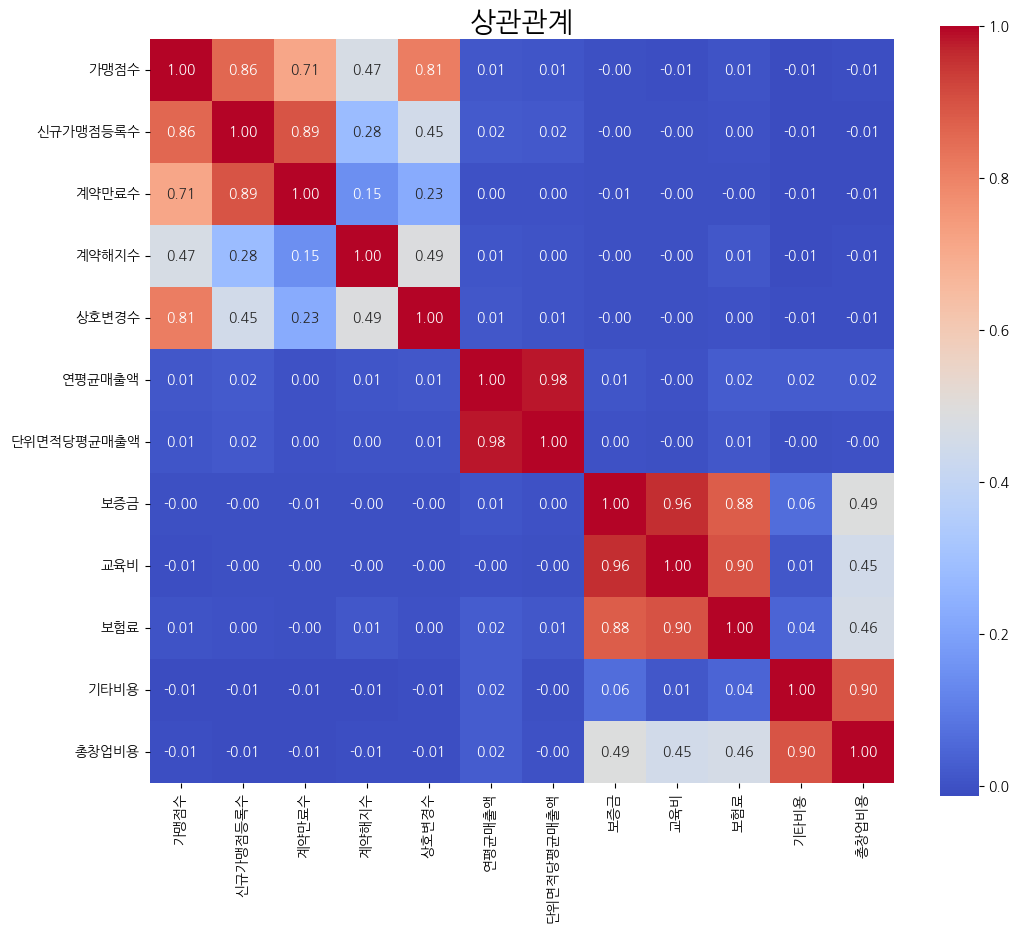

In [120]:
# 수치형 변수들의 상관관계 분석
num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()    
corr_df = merged_df[num_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))    
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', square=True)   
plt.title('상관관계', fontsize=20) 
plt.show()

In [121]:
# -삭제 컬럼: 단위면적당평균매출액,보증금, 기타비용
# '단위면적당평균매출액' 삭제하면 안됨

merged_df.drop(columns=[ '보증금', '기타비용'],axis=1, inplace=True)    


In [122]:
merged_df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용,주요취급상품
0,외식,한식,8797푸드,돼지가 김치찜했어,4,2,0,0,0,0,0,550.0,0.0,44550.0,김치찜
2,외식,한식,(주)네오플러스,돼왕국밥,0,0,0,0,0,0,0,1100.0,0.0,23540.0,국밥 등 국물요리류
3,외식,한식,(주)덩실덩실,돼슐랭,0,0,0,0,0,0,0,3300.0,1000.0,92300.0,돼지고기
4,외식,한식,(주)와이앤티푸드,동해물과 아구찜,11,17,6,0,0,0,0,2200.0,1000.0,45000.0,아구찜
5,외식,한식,아이이에프에스(주),동해강릉초당짬뽕순두부,4,4,0,0,0,0,0,3300.0,2000.0,47100.0,"짬뽕순두부, 초당순두부"


In [123]:
merged_df[merged_df['연평균매출액'] <= 0].shape

(5488, 15)

In [124]:
# 매출이 0 이상인 데이터만 남기기

merged_df = merged_df[merged_df['연평균매출액'] > 0]    
merged_df.shape

(3557, 15)

In [125]:
merged_df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용,주요취급상품
8,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,20672,3300.0,5000.0,67150.0,곱창 전문점
10,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,19999,3300.0,2000.0,105750.0,"양념 소갈비살, 불고기 등"
12,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,13836,5500.0,1000.0,40930.0,족발
15,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,7434,5500.0,3000.0,67460.0,"낙지, 곱창 전문점"
17,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,1623,5500.0,5000.0,192000.0,소고기·돼지고기 전문점


In [126]:
# 수치형 컬럼만 추출하여 업종대분류별 평균 계산
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
grouped_mean = merged_df.groupby('업종대분류')[numeric_cols].mean().reset_index()

grouped_mean


,업종대분류,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용
0,도소매,317.420765,42.535519,11.098361,12.693989,18.393443,1.131237e+06,89749.792350,2674.918033,21840.163934,126264.732240
1,서비스,75.598901,11.390110,6.009158,1.945055,1.952381,2.663838e+05,5580.401099,3872.364469,5283.699634,186423.703297
2,외식,44.001061,9.134017,4.642504,1.461457,2.776167,3.229630e+05,13215.124823,3811.483380,2862.461103,94048.369519


In [127]:
# 업종대분류 기준 describe 통계
grouped_desc = merged_df.groupby('업종대분류')[numeric_cols].describe()

grouped_desc


가맹점수                           ...     총창업비용                     
        count        mean          std  ...       50%       75%        max
업종대분류                                   ...                               
도소매     183.0  317.420765  1942.958564  ...   85800.0  156002.5  1056250.0
서비스     546.0   75.598901   218.466831  ...  114832.0  195575.0  8743075.0
외식     2828.0   44.001061   127.314816  ...   76275.0  111077.5   934750.0

[3 rows x 80 columns]

In [128]:
# 통계점검
## 연평균매출액과 업종대분류

# 도소매, 외식, 서비스로 데이터 나누기
retail_df = merged_df[merged_df['업종대분류'] == '도소매']
food_df = merged_df[merged_df['업종대분류'] == '외식']
service_df = merged_df[merged_df['업종대분류'] == '서비스']


In [129]:

# 정규성 검정
# 귀무가설 : 각 업종대분류의 연평균매출액은 정규분포를 따른다.
# 대립가설 : 각 업종대분류의 연평균매출액은 정규분포를 따르지 않는다.
 
from scipy import stats 

print(stats.normaltest(retail_df['연평균매출액']) )# p-value < 0.05 -> 정규성 없음
print(stats.normaltest(food_df['연평균매출액'])  )  
print(stats.normaltest(service_df['연평균매출액']) )

NormaltestResult(statistic=np.float64(402.63801123954687), pvalue=np.float64(3.7005540944790115e-88))
NormaltestResult(statistic=np.float64(3131.7280493314292), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(1051.0264190337255), pvalue=np.float64(5.9226073268763925e-229))


In [130]:
# 정규분포 따르지 않기 떄문에 비모수 검정
# 귀무가설 : 각 업종대분류의 연평균매출액은 차이가 없다.
# 대립가설 : 각 업종대분류의 연평균매출액은 차이가 있다.

from scipy.stats import kruskal
stat, p_value = kruskal(retail_df['연평균매출액'], food_df['연평균매출액'], service_df['연평균매출액']) 
print(f"statistic: {stat}, p-value: {p_value}")

statistic: 88.55799324161374, p-value: 5.886756925065771e-20


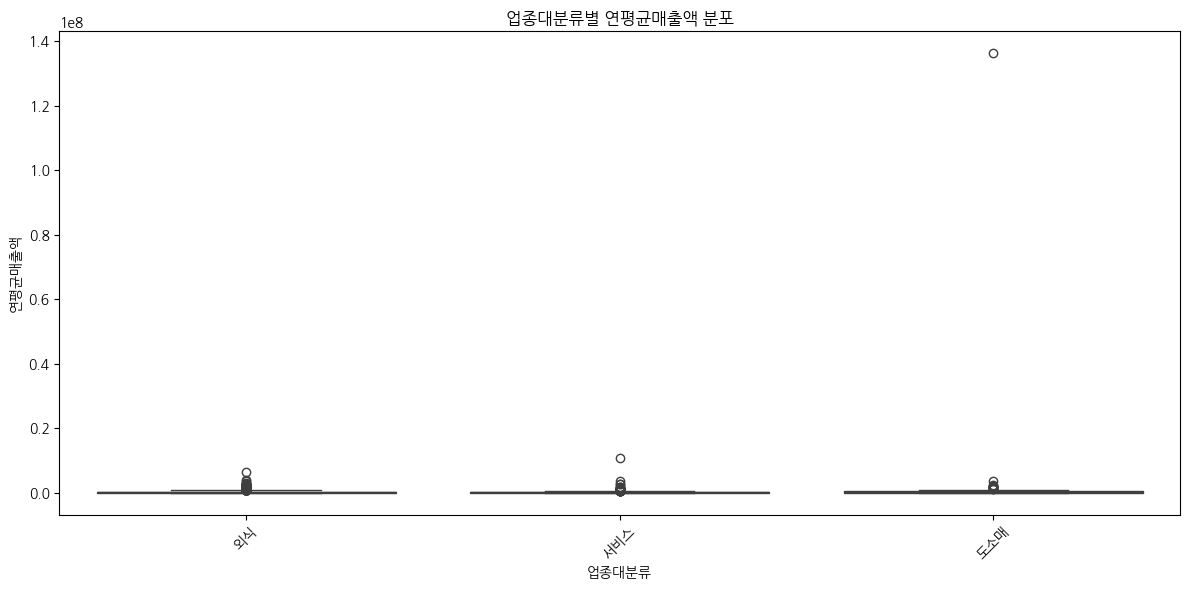

In [131]:
# 업종대분류별 연평균매출액 박스플롯

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='업종대분류', y='연평균매출액')
plt.title('업종대분류별 연평균매출액 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [132]:
merged_df.pivot_table(index='업종대분류',values='연평균매출액', aggfunc='mean')  


,연평균매출액
업종대분류,
도소매,1.131237e+06
서비스,2.663838e+05
외식,3.229630e+05


In [133]:
# 총창업비용

print(stats.normaltest(retail_df['총창업비용']) )# p-value < 0.05 -> 정규성 없음
print(stats.normaltest(food_df['총창업비용'])  )  
print(stats.normaltest(service_df['총창업비용']) )

NormaltestResult(statistic=np.float64(161.76505093682528), pvalue=np.float64(7.467332791590079e-36))
NormaltestResult(statistic=np.float64(2374.0819502897402), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(1048.5699771302911), pvalue=np.float64(2.0226583023073978e-228))


In [134]:
# 정규분포 따르지 않기 떄문에 비모수 검정 -> 크루칼 검정 실행
stat, p_value = kruskal(retail_df['총창업비용'], food_df['총창업비용'], service_df['총창업비용'])   
print(f"statistic: {stat}, p-value: {p_value}") 


statistic: 72.26637674032342, p-value: 2.0302787882611394e-16


/var/folders/q9/1gz00szn5vz5011w8pll4_8h0000gn/T/ipykernel_1425/368508476.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='업종대분류')


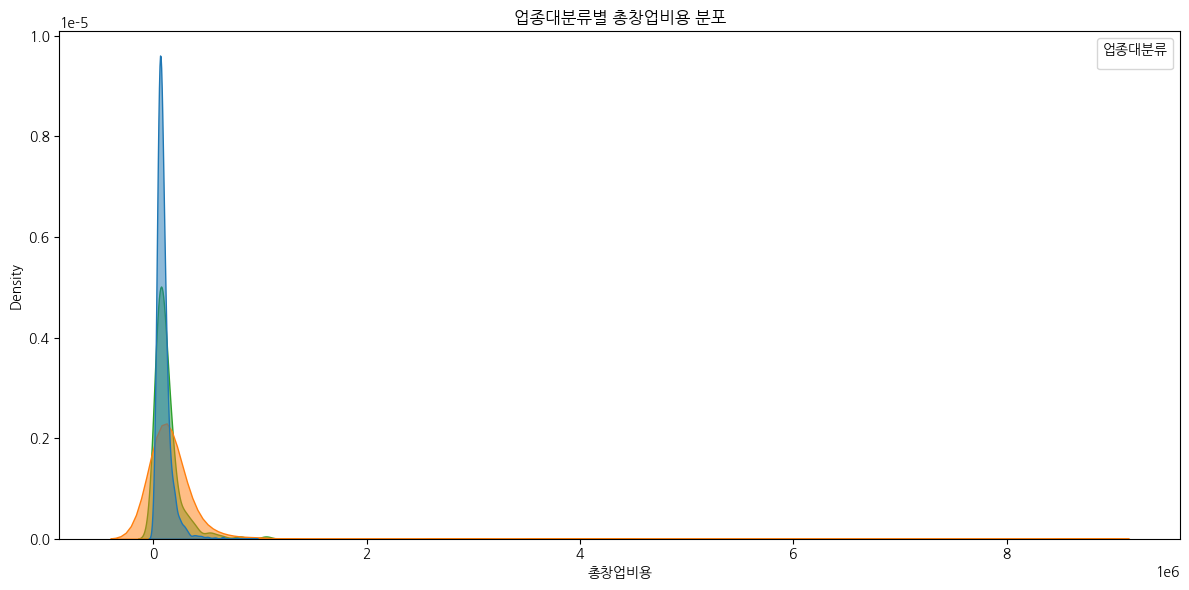

In [135]:
# 업종대분류별 총창업비용 kde
plt.figure(figsize=(12, 6)) 
sns.kdeplot(data=merged_df, x='총창업비용', hue='업종대분류', fill=True, common_norm=False, alpha=0.5)
plt.title('업종대분류별 총창업비용 분포')
plt.xlabel('총창업비용')
plt.ylabel('Density')
plt.legend(title='업종대분류')
plt.tight_layout()
plt.show()



In [136]:
merged_df.pivot_table(index='업종대분류',values='총창업비용', aggfunc='mean')  


,총창업비용
업종대분류,
도소매,126264.732240
서비스,186423.703297
외식,94048.369519


In [137]:
# 업종대분류별로 교육비에 차이가 있는지

print(stats.normaltest(retail_df['교육비']) )# p-value < 0.05 -> 정규성 없음    
print(stats.normaltest(food_df['교육비'])  )    
print(stats.normaltest(service_df['교육비']) )  


NormaltestResult(statistic=np.float64(143.59713244949484), pvalue=np.float64(6.580802846644288e-32))
NormaltestResult(statistic=np.float64(3092.892793915071), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(485.5282247041563), pvalue=np.float64(3.705830926603222e-106))


In [138]:
# 크루칼 검정
stat, p_value = kruskal(retail_df['교육비'], food_df['교육비'], service_df['교육비'])   
print(f"statistic: {stat}, p-value: {p_value}") 


statistic: 137.7049901768106, p-value: 1.2523949790707827e-30


In [139]:
# 업종대분류별 평균값 
merged_df.pivot_table(index='업종대분류',values='교육비', aggfunc='mean')  



,교육비
업종대분류,
도소매,2674.918033
서비스,3872.364469
외식,3811.483380


In [140]:
merged_df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용,주요취급상품
8,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,20672,3300.0,5000.0,67150.0,곱창 전문점
10,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,19999,3300.0,2000.0,105750.0,"양념 소갈비살, 불고기 등"
12,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,13836,5500.0,1000.0,40930.0,족발
15,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,7434,5500.0,3000.0,67460.0,"낙지, 곱창 전문점"
17,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,1623,5500.0,5000.0,192000.0,소고기·돼지고기 전문점


### 파생 변수 생성

In [ ]:
# 비율 파생 변수 생성
# merged_df["신규가맹점등록비율"] = merged_df["신규가맹점등록수"] / merged_df["가맹점수"]
# merged_df["계약종료비율"] = (merged_df["계약만료수"] + merged_df["계약해지수"]) / merged_df["가맹점수"]
# merged_df["계약해지비율"] = merged_df["계약해지수"] / merged_df["가맹점수"]
# merged_df["상호변경비율"] = merged_df["상호변경수"] / merged_df["가맹점수"]
# #merged_df["추정폐점율"] = merged_df["추정폐점수"] / merged_df["가맹점수"]
# merged_df["면적당창업비용"] = merged_df["총창업비용"] / merged_df["단위면적당평균매출액"]
# merged_df["수익대비창업비율"] = merged_df["총창업비용"] / merged_df["연평균매출액"]
# # 추정 폐점 수
# merged_df["추정폐점수"] = merged_df["계약만료수"].fillna(0) + merged_df["계약해지수"].fillna(0)
# # 폐점율
# merged_df["폐점율"] = merged_df["추정폐점수"] / merged_df["가맹점수"]


In [142]:
# 업종중분류별 평균 교육비
merged_df['대_업종별평균교육비'] = merged_df.groupby('업종대분류')['교육비'].transform('mean')
# 업종중분류별 평균 총창업비용
merged_df['대_업종별평균창업비용'] = merged_df.groupby('업종대분류')['총창업비용'].transform('mean')

merged_df['중_업종별평균교육비'] = merged_df.groupby('업종중분류')['교육비'].transform('mean')
# 업종중분류별 평균 총창업비용
merged_df['중_업종별평균창업비용'] = merged_df.groupby('업종중분류')['총창업비용'].transform('mean')




In [143]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 8 to 11132
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업종대분류        3557 non-null   object 
 1   업종중분류        3557 non-null   object 
 2   법인명          3557 non-null   object 
 3   브랜드명         3557 non-null   object 
 4   가맹점수         3557 non-null   int64  
 5   신규가맹점등록수     3557 non-null   int64  
 6   계약만료수        3557 non-null   int64  
 7   계약해지수        3557 non-null   int64  
 8   상호변경수        3557 non-null   int64  
 9   연평균매출액       3557 non-null   int64  
 10  단위면적당평균매출액   3557 non-null   int64  
 11  교육비          3557 non-null   float64
 12  보험료          3557 non-null   float64
 13  총창업비용        3557 non-null   float64
 14  주요취급상품       3557 non-null   object 
 15  대_업종별평균교육비   3557 non-null   float64
 16  대_업종별평균창업비용  3557 non-null   float64
 17  중_업종별평균교육비   3557 non-null   float64
 18  중_업종별평균창업비용  3557 non-null   float64
dtypes: float64

In [144]:
merged_df.head(3)

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용,주요취급상품,대_업종별평균교육비,대_업종별평균창업비용,중_업종별평균교육비,중_업종별평균창업비용
8,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,20672,3300.0,5000.0,67150.0,곱창 전문점,3811.48338,94048.369519,3836.503268,97139.905229
10,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,19999,3300.0,2000.0,105750.0,"양념 소갈비살, 불고기 등",3811.48338,94048.369519,3836.503268,97139.905229
12,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,13836,5500.0,1000.0,40930.0,족발,3811.48338,94048.369519,3836.503268,97139.905229


In [225]:
merged_df['업종중분류'].unique()

array(['한식', '분식', '서양식', '일식', '치킨', '중식', '주점', '패스트푸드', '기타 외국식',
       '기타 외식', '피자', '커피', '제과제빵', '음료 (커피 외)', '스포츠 관련', '아이스크림/빙수 ',
       '안경', '교육 (교과)', '(건강)식품', '농수산물', '기타 서비스', '기타도소매', '유아관련', '세탁',
       '교육 (외국어)', '이사', '운송', '반려동물 관련', '편의점', '기타 교육', '종합소매점',
       '의류 / 패션', '이미용', '화장품', '자동차 관련', 'PC방', '유아 관련 (교육 외)', '오락',
       '임대', '부동산 중개 ', '숙박', '배달', '인력 파견'], dtype=object)

In [227]:
merged_df['주요취급상품'].nunique()  

2196

In [ ]:
merged_df['주요취급상품'].value_counts().sort_values(ascending=False)



### 매출 예측

In [145]:
X=merged_df[['업종대분류', '업종중분류', '교육비', '총창업비용', '대_업종별평균교육비','대_업종별평균창업비용','중_업종별평균교육비','중_업종별평균창업비용']].copy()
y=merged_df['연평균매출액'] 



In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# 1. X, y 지정
X=merged_df[['업종대분류', '업종중분류', '교육비', '총창업비용','단위면적당평균매출액','대_업종별평균교육비','대_업종별평균창업비용','중_업종별평균교육비','중_업종별평균창업비용']].copy()


y = merged_df['연평균매출액']

# 2. Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. 컬럼 분리
categorical_cols = [ '업종대분류','업종중분류']
numeric_cols = ['교육비', '총창업비용','단위면적당평균매출액','대_업종별평균교육비','대_업종별평균창업비용','중_업종별평균교육비','중_업종별평균창업비용']

# 4. 전처리 (범주형: OneHot, 수치형: StandardScaler)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# 5. 파이프라인 구성
model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor())
])

# 6. 모델 학습
model_pipeline.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.4f}')


MSE: 172239520373.38
R² Score: 0.3549


In [148]:
merged_df.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용,주요취급상품,대_업종별평균교육비,대_업종별평균창업비용,중_업종별평균교육비,중_업종별평균창업비용
8,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,20672,3300.0,5000.0,67150.0,곱창 전문점,3811.48338,94048.369519,3836.503268,97139.905229
10,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,19999,3300.0,2000.0,105750.0,"양념 소갈비살, 불고기 등",3811.48338,94048.369519,3836.503268,97139.905229
12,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,13836,5500.0,1000.0,40930.0,족발,3811.48338,94048.369519,3836.503268,97139.905229
15,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,7434,5500.0,3000.0,67460.0,"낙지, 곱창 전문점",3811.48338,94048.369519,3836.503268,97139.905229
17,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,1623,5500.0,5000.0,192000.0,소고기·돼지고기 전문점,3811.48338,94048.369519,3836.503268,97139.905229


In [149]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 8 to 11132
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업종대분류        3557 non-null   object 
 1   업종중분류        3557 non-null   object 
 2   법인명          3557 non-null   object 
 3   브랜드명         3557 non-null   object 
 4   가맹점수         3557 non-null   int64  
 5   신규가맹점등록수     3557 non-null   int64  
 6   계약만료수        3557 non-null   int64  
 7   계약해지수        3557 non-null   int64  
 8   상호변경수        3557 non-null   int64  
 9   연평균매출액       3557 non-null   int64  
 10  단위면적당평균매출액   3557 non-null   int64  
 11  교육비          3557 non-null   float64
 12  보험료          3557 non-null   float64
 13  총창업비용        3557 non-null   float64
 14  주요취급상품       3557 non-null   object 
 15  대_업종별평균교육비   3557 non-null   float64
 16  대_업종별평균창업비용  3557 non-null   float64
 17  중_업종별평균교육비   3557 non-null   float64
 18  중_업종별평균창업비용  3557 non-null   float64
dtypes: float64

In [150]:
# 가맹점당 평균 매출액
merged_df['가맹점당_평균매출액'] = merged_df['연평균매출액'] / merged_df['가맹점수']

# 창업비용 대비 수익률
merged_df['수익률'] = merged_df['연평균매출액'] / merged_df['총창업비용']

# 면적당 수익 대비 창업비용 비율
merged_df['면적당비용비율'] = merged_df['총창업비용'] / merged_df['단위면적당평균매출액']

# 해지율, 만료율
merged_df['해지율'] = merged_df['계약해지수'] / merged_df['가맹점수']
merged_df['만료율'] = merged_df['계약만료수'] / merged_df['가맹점수']

merged_df['추정패지율']= merged_df['계약해지수'] + merged_df['계약만료수'] / merged_df['가맹점수']

# 신규 가맹 비율
merged_df['신규가맹비율'] = merged_df['신규가맹점등록수'] / merged_df['가맹점수']

# 브랜드 유지율
merged_df['브랜드유지율'] = 1 - (merged_df['계약해지수'] + merged_df['계약만료수']) / merged_df['가맹점수']

# 브랜드별 평균 매출 (브랜드 기준 그룹 평균)
merged_df['브랜드_평균매출'] = merged_df.groupby('브랜드명')['연평균매출액'].transform('mean')

# 법인별 평균 매출
merged_df['법인_평균매출'] = merged_df.groupby('법인명')['연평균매출액'].transform('mean')


In [151]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557 entries, 8 to 11132
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업종대분류        3557 non-null   object 
 1   업종중분류        3557 non-null   object 
 2   법인명          3557 non-null   object 
 3   브랜드명         3557 non-null   object 
 4   가맹점수         3557 non-null   int64  
 5   신규가맹점등록수     3557 non-null   int64  
 6   계약만료수        3557 non-null   int64  
 7   계약해지수        3557 non-null   int64  
 8   상호변경수        3557 non-null   int64  
 9   연평균매출액       3557 non-null   int64  
 10  단위면적당평균매출액   3557 non-null   int64  
 11  교육비          3557 non-null   float64
 12  보험료          3557 non-null   float64
 13  총창업비용        3557 non-null   float64
 14  주요취급상품       3557 non-null   object 
 15  대_업종별평균교육비   3557 non-null   float64
 16  대_업종별평균창업비용  3557 non-null   float64
 17  중_업종별평균교육비   3557 non-null   float64
 18  중_업종별평균창업비용  3557 non-null   float64
 19  가맹점당_평균매출액

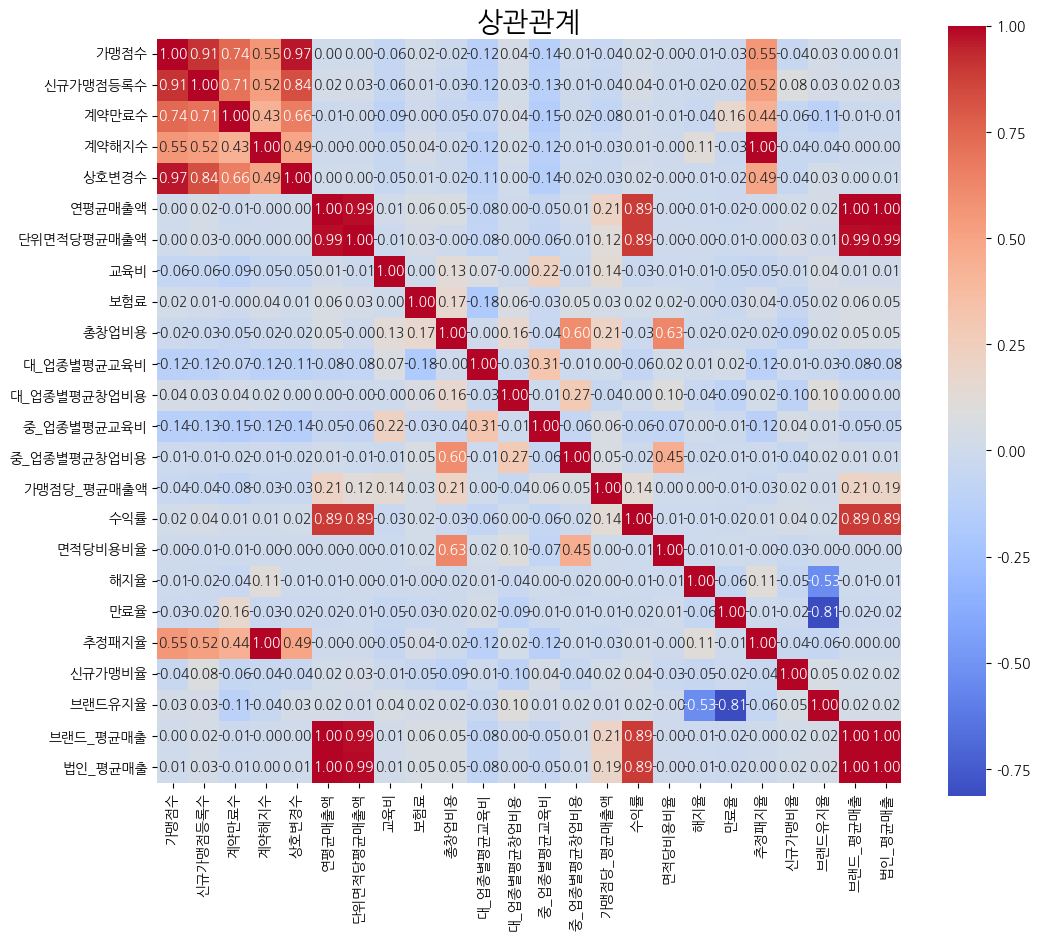

In [152]:
# 수치형 변수들의 상관관계
num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
corr_df = merged_df[num_cols].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('상관관계', fontsize=20)
plt.show()


In [153]:
clustering_features = [
    '계약해지수',         # 폐점 관련
    '상호변경수',         # 브랜드 변경 활동
    '교육비',            # 본사 투자
    '총창업비용',         # 창업비용
    '연평균매출액',            # 수익성
    # '면적당비용비율',      # 효율성
    '추정패지율',         
    '신규가맹비율',        # 확장성
]


### 크러스터링

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 사용할 컬럼 
# cluster_cols = [
#     "추정폐점수",
#     "폐점율",
#     "연평균매출액",
#     "총창업비용",
#     "신규가맹점등록수",
#     "단위면적당평균매출액",
#     "신규가맹점등록비율",
#     "계약종료비율",
#     "계약해지비율",
#     "상호변경비율",
#     "추정폐점율",
#     "면적당창업비용",
#     "수익대비창업비율"
# ]

cluster_cols =[
    '계약해지수',         # 폐점 관련
    '상호변경수',         # 브랜드 변경 활동
    '교육비',            # 본사 투자
    '총창업비용',         # 창업비용
    '연평균매출액',            # 수익성
    # '면적당비용비율',      # 효율성
    '추정패지율',         
    '신규가맹비율',        # 확장성
]



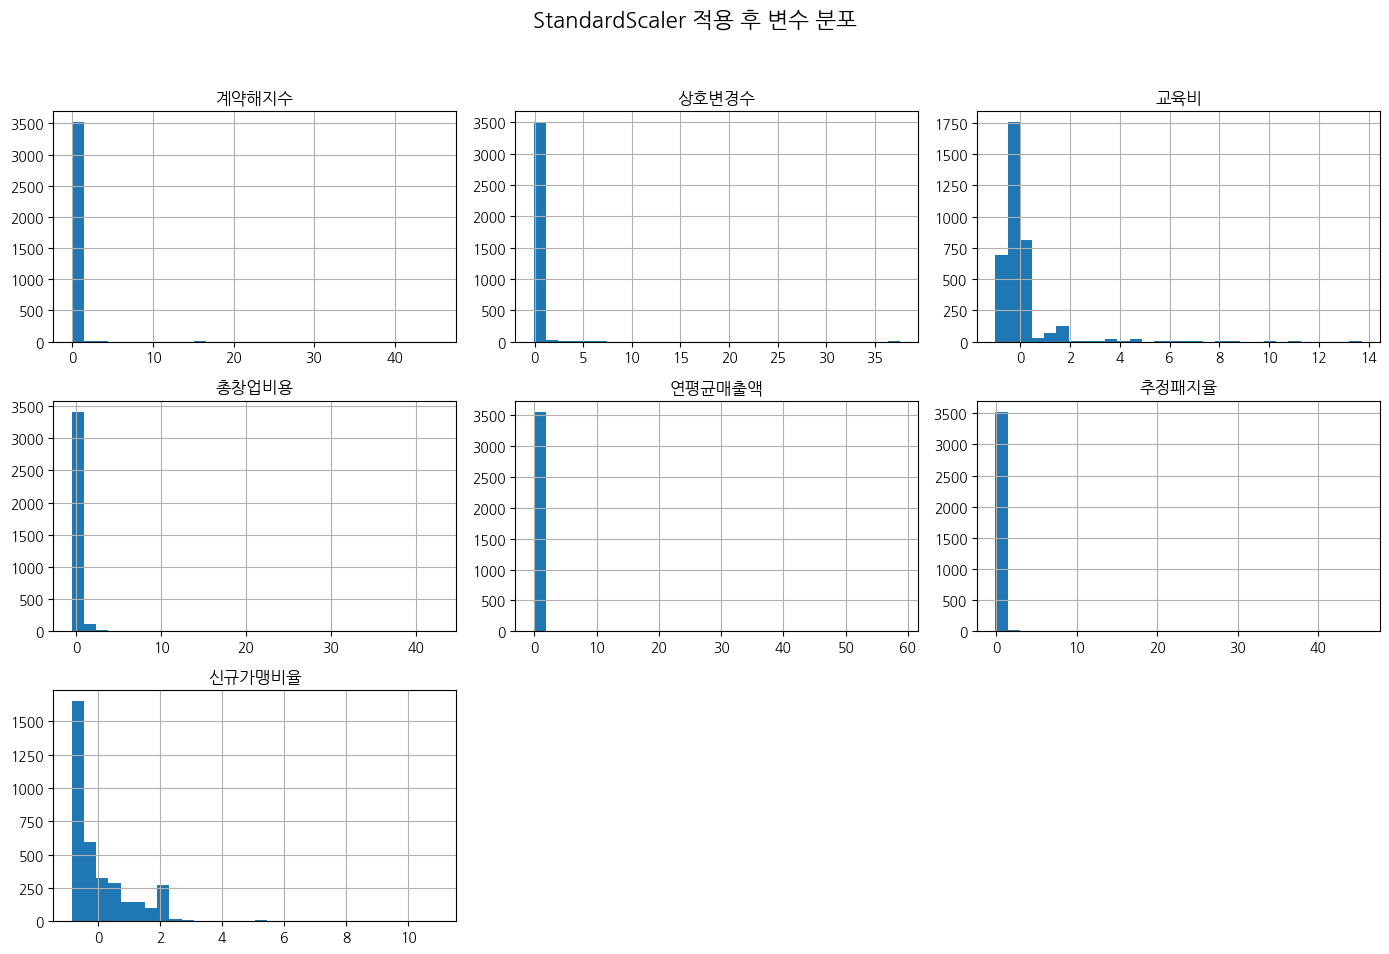

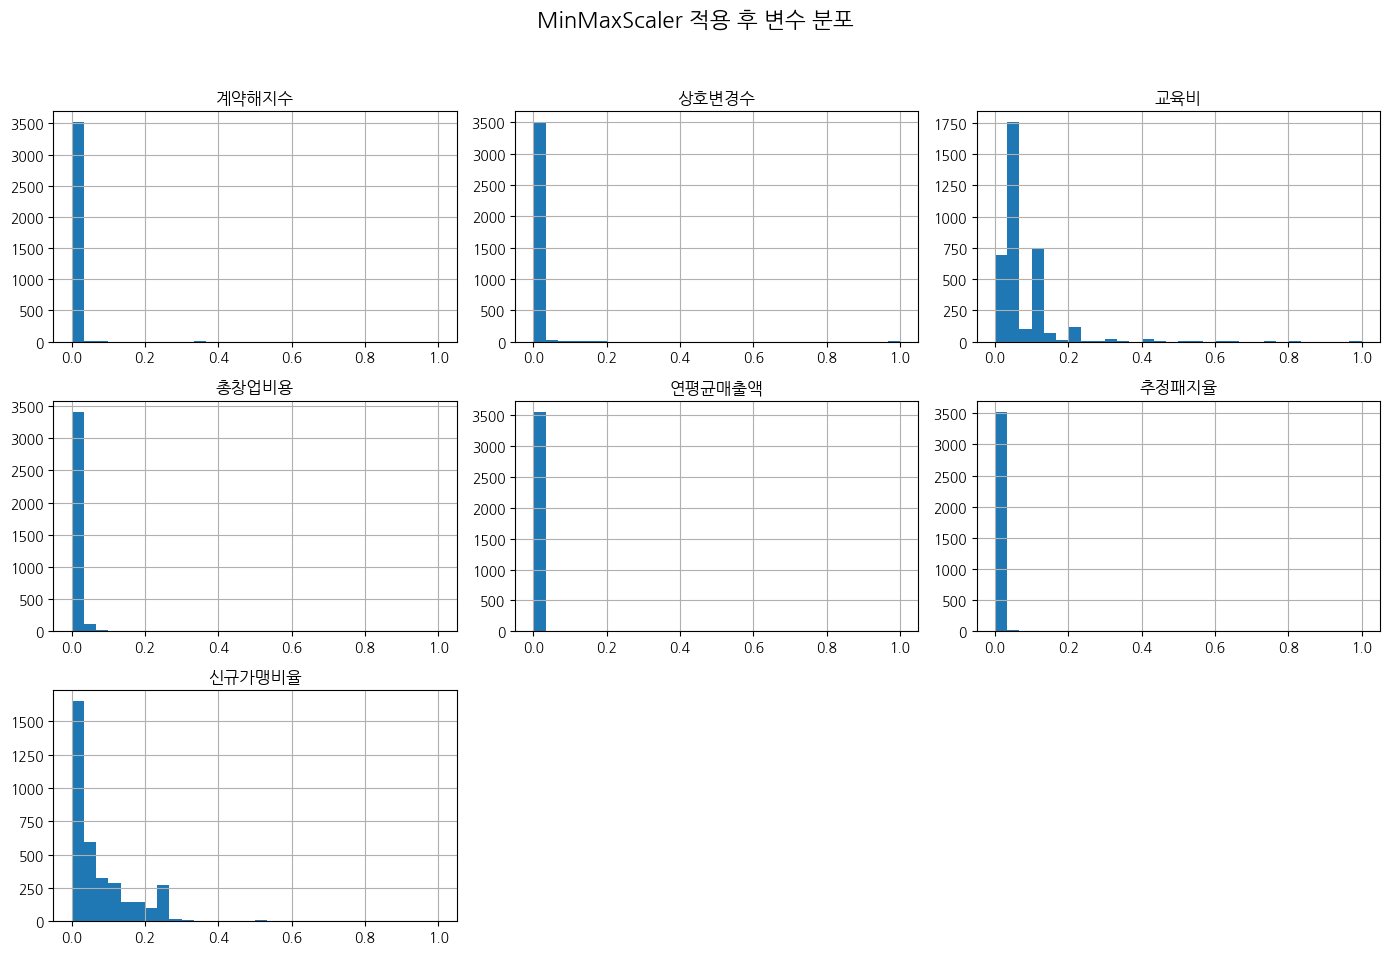

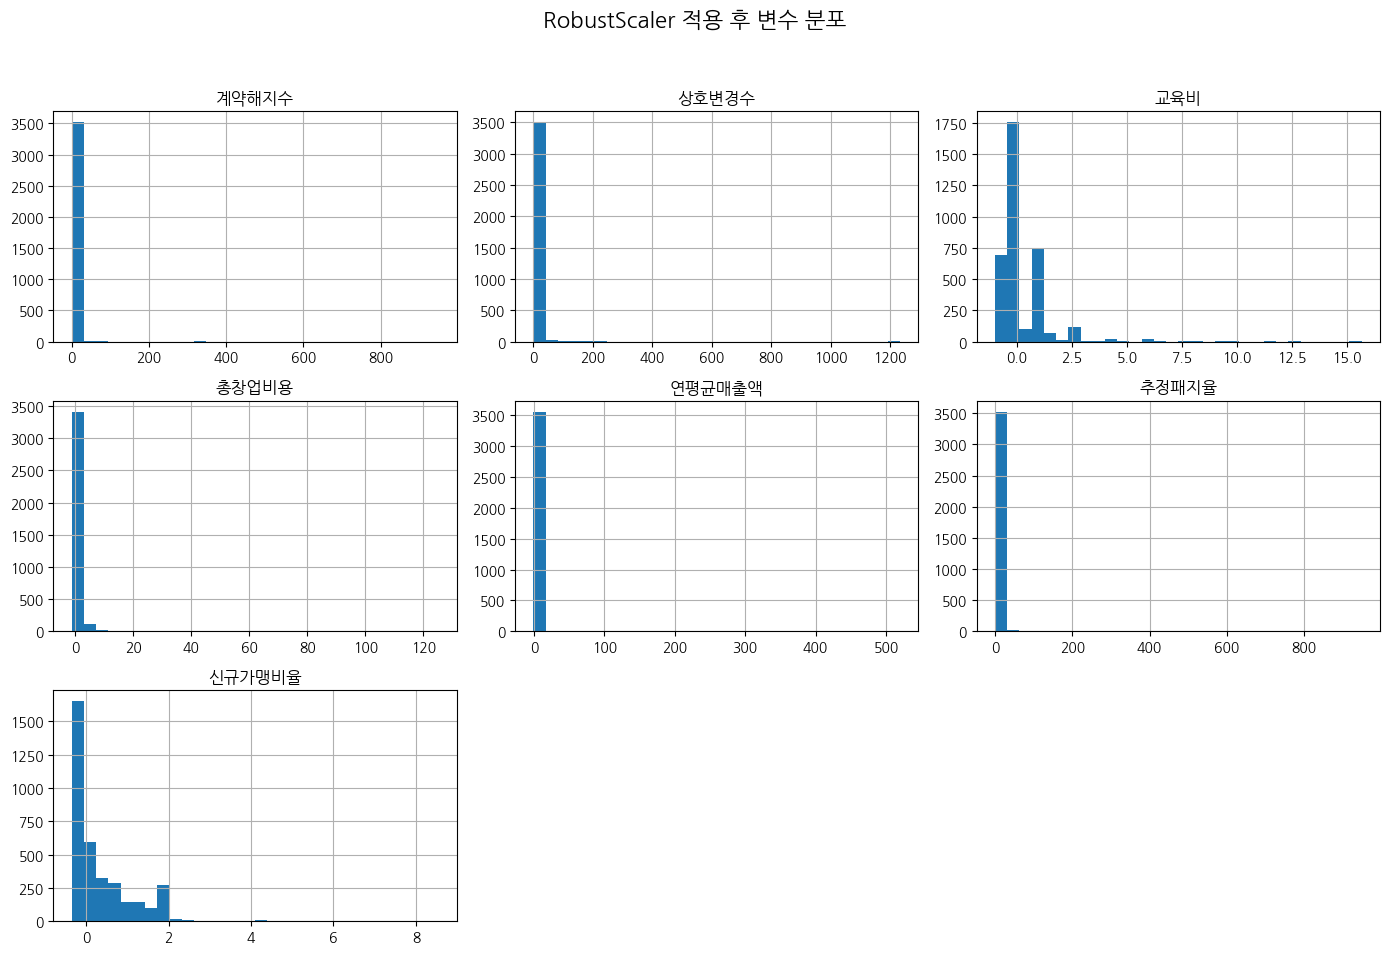

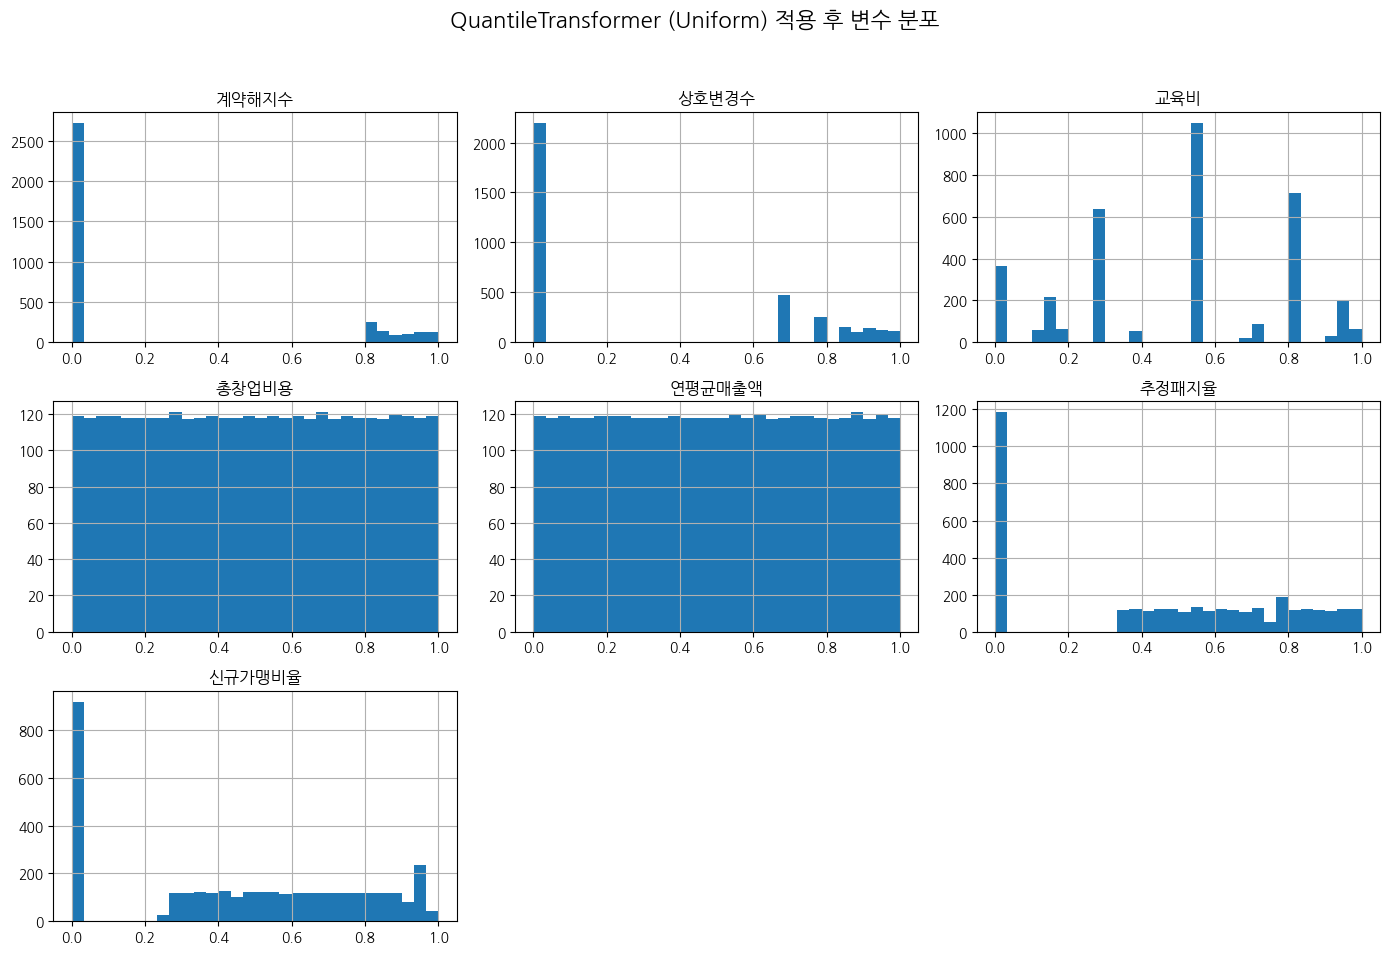

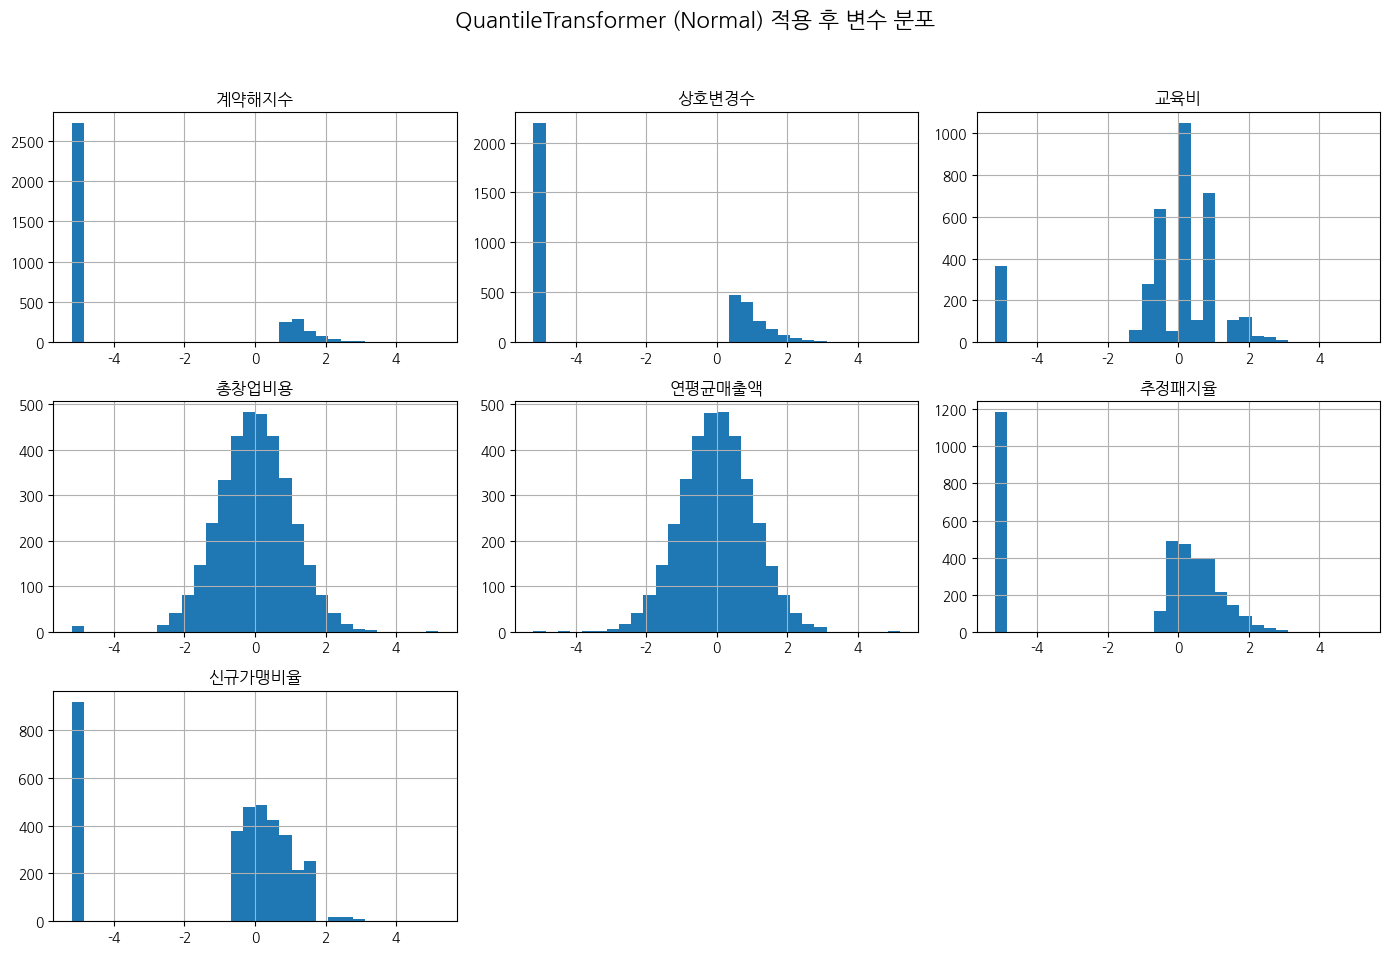

In [155]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 클러스터링에 사용할 변수 정의
cluster_cols = [
    '계약해지수',         # 폐점 관련
    '상호변경수',         # 브랜드 변경 활동
    '교육비',            # 본사 투자
    '총창업비용',         # 창업비용
    '연평균매출액',            # 수익성
    # '면적당비용비율',      # 효율성
    '추정패지율',         
    '신규가맹비율',        # 확장성
]

# 데이터 추출 및 전처리 (결측치 및 무한대 제거)
X = merged_df[cluster_cols].replace([np.inf, -np.inf], np.nan).dropna()

# 스케일러 정의
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer (Uniform)": QuantileTransformer(output_distribution='uniform', random_state=0),
    "QuantileTransformer (Normal)": QuantileTransformer(output_distribution='normal', random_state=0)
}

# 각 스케일러에 대해 시각화
for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # 히스토그램 출력
    X_scaled_df.hist(bins=30, figsize=(14, 10))
    plt.suptitle(f"{name} 적용 후 변수 분포", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarni

Text(0.5, 1.0, '상관계수 행렬')

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/leehyunjoo/Library/Python/3.9/

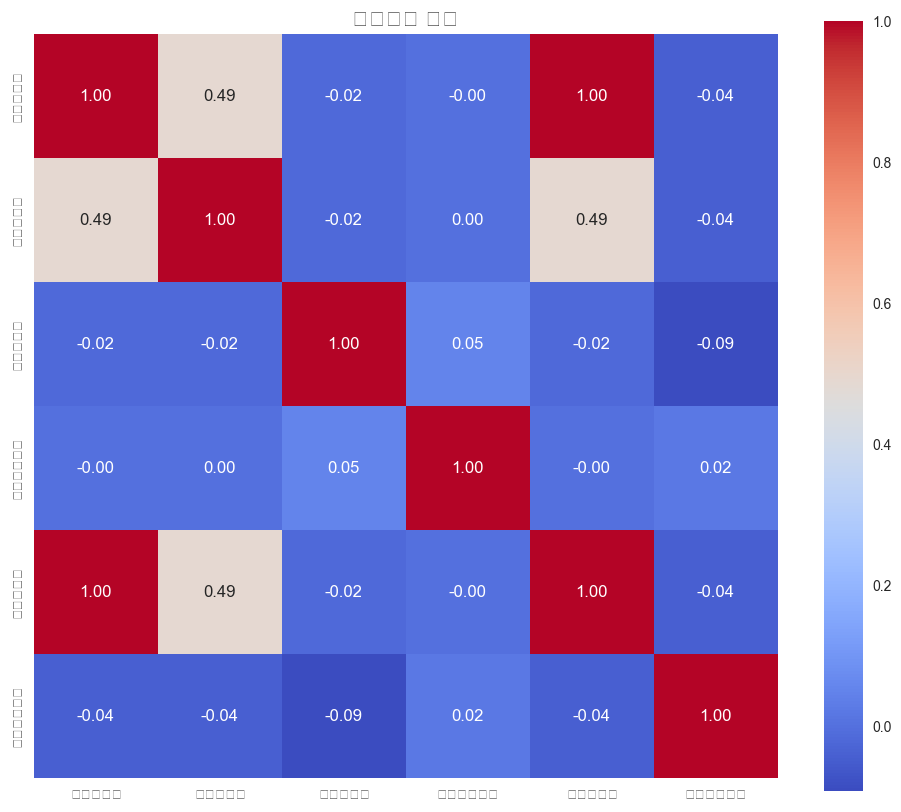

In [229]:
X[cluster_cols].corr()
# 상관계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(X[cluster_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)    
plt.title("상관계수 행렬", fontsize=16)

In [ ]:
# 연평균매출액과 단위면적당평균매출액은 거의 같은 정보를 줄 수 있음
# 계약종료비율과 계약해지비율
# 총창업비용과 수익대비창업비율 


In [ ]:
# cluster_cols = [
#     "연평균매출액",         # 수익성 (효율성 반영 O)
#     "수익대비창업비율",       # 효율성 지표
#     "신규가맹점등록비율",     # 성장 가능성
#     "계약해지비율",          # 자발적 이탈 → 안정성 판단
#     "추정폐점수",            # 실패 리스크 반영
#     "면적당창업비용"         # 효율적 투자 판단
# ]

cluster_cols=[
    #'계약해지수',         # 폐점 관련
    #'상호변경수',         # 브랜드 변경 활동
    #'교육비',            # 본사 투자
    '총창업비용',         # 창업비용
    '연평균매출액',            # 수익성
    # '면적당비용비율',      # 효율성
    '추정패지율',         
    '신규가맹비율',        # 확장성
]
X = merged_df[cluster_cols].dropna()



In [193]:
from sklearn.preprocessing import QuantileTransformer

# inf/-inf를 NaN으로 변환
X_cleaned = X.replace([np.inf, -np.inf], np.nan)

# NaN 제거
X_cleaned = X_cleaned.dropna()

scaler = QuantileTransformer(output_distribution='normal', random_state=0)
X_scaled = scaler.fit_transform(X_cleaned)

In [203]:
# 가중치 정의
weights = {
    '총창업비용': 1.5,
    '연평균매출액': 1.0,
    '추정패지율': 1.0,
    '신규가맹비율': 1.0
}

In [204]:
# 가중치 적용
for col, weight in weights.items():
    X_scaled_df[col] *= weight

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


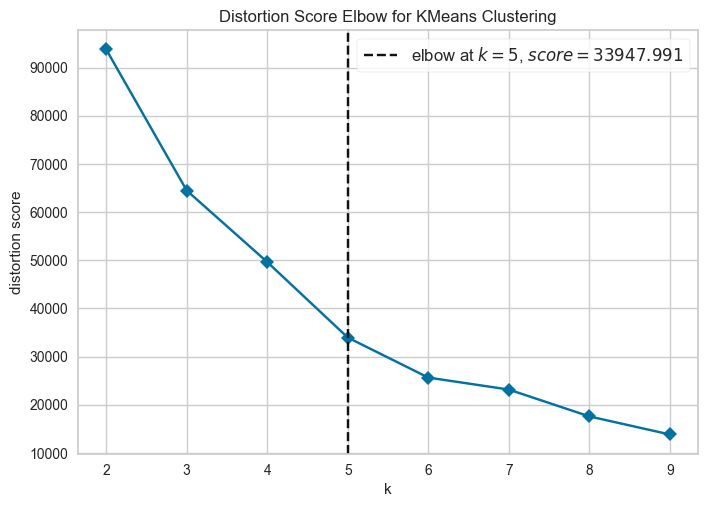

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [205]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# KMeans 객체 정의
kmeans = KMeans(random_state=0, n_init='auto')

# Elbow Method 시각화
visualizer = KElbowVisualizer(kmeans, k=(2, 10), timings=False)
visualizer.fit(X_scaled)
visualizer.show()


In [206]:

n_cluster=5
k_means=KMeans(n_clusters=n_cluster,n_init='auto',random_state=111)
k_means.fit(X_scaled)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


KMeans(n_clusters=5, random_state=111)

In [207]:

# 클러스터 중심과 SSE 출력
centroids = k_means.cluster_centers_
inertia = k_means.inertia_

In [208]:
from sklearn.metrics import silhouette_score


In [209]:
silhouettes_avg=silhouette_score(X_scaled,k_means.labels_)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [210]:
silhouettes_avg

np.float64(0.4552037142459016)

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


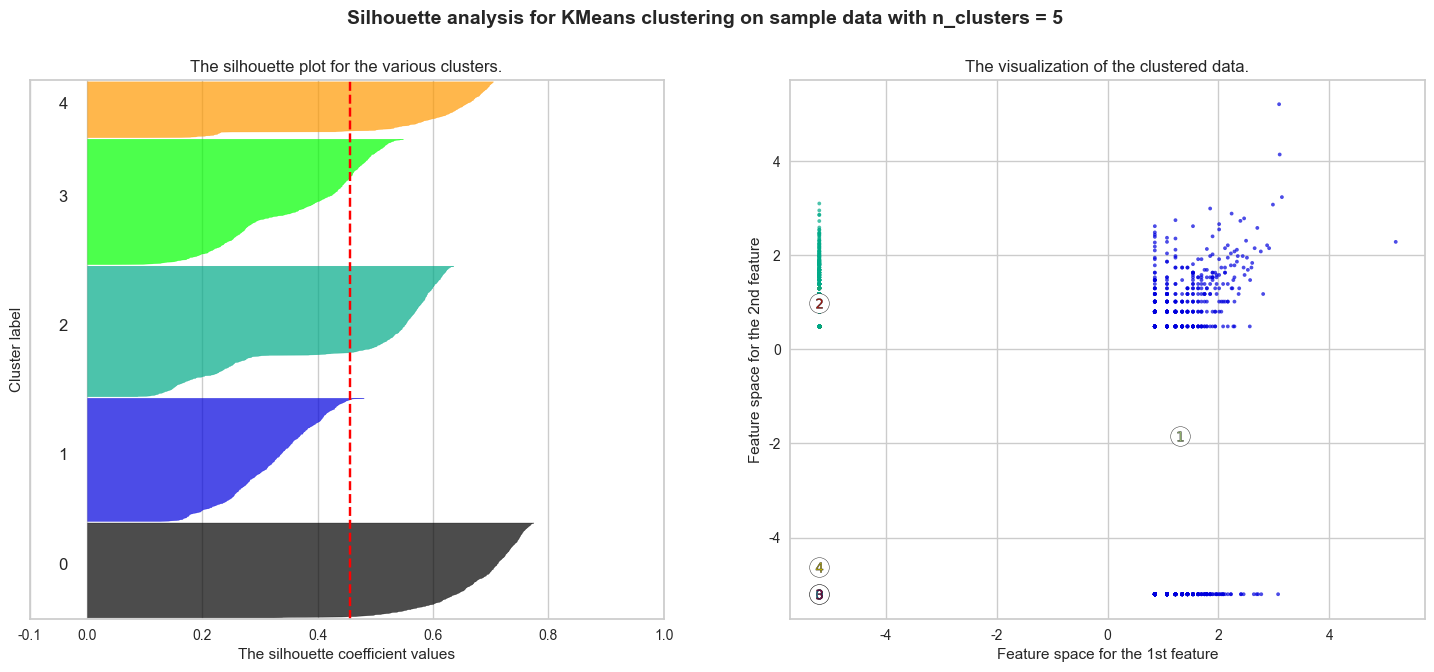

In [211]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_scaled) + (n_cluster + 1) * 10])

cluster_labels = k_means.labels_
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(n_cluster):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouettes_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
ax2.scatter(
    X_scaled[:, 0], X_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = k_means.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_cluster,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [212]:
# 클러스터 라벨 생성
cluster_labels = k_means.labels_

# 원래 스케일링 전 데이터프레임 (결측 제거된 것과 인덱스 동일해야 함)에 클러스터 라벨 추가
X_cleaned_with_cluster = X_cleaned.copy()
X_cleaned_with_cluster['클러스터'] = cluster_labels

# 만약 merged_df와 다시 결합하고 싶다면 인덱스 기준으로 병합
merged_with_cluster = merged_df.loc[X_cleaned_with_cluster.index].copy()
merged_with_cluster['클러스터'] = cluster_labels


In [213]:
merged_with_cluster.head()

,업종대분류,업종중분류,법인명,브랜드명,가맹점수,신규가맹점등록수,계약만료수,계약해지수,상호변경수,연평균매출액,단위면적당평균매출액,교육비,보험료,총창업비용,주요취급상품,대_업종별평균교육비,대_업종별평균창업비용,중_업종별평균교육비,중_업종별평균창업비용,가맹점당_평균매출액,수익률,면적당비용비율,해지율,만료율,추정패지율,신규가맹비율,브랜드유지율,브랜드_평균매출,법인_평균매출,클러스터
8,외식,한식,(주)모두가족,동춘돌곱창,35,15,10,0,0,513954,20672,3300.0,5000.0,67150.0,곱창 전문점,3811.48338,94048.369519,3836.503268,97139.905229,14684.400000,7.653820,3.248355,0.0,0.285714,0.285714,0.428571,0.714286,513954.0,291319.5,3
10,외식,한식,(주)아름드리원,동적깡통구이,8,2,2,0,0,923033,19999,3300.0,2000.0,105750.0,"양념 소갈비살, 불고기 등",3811.48338,94048.369519,3836.503268,97139.905229,115379.125000,8.728444,5.287764,0.0,0.250000,0.250000,0.250000,0.750000,923033.0,923033.0,3
12,외식,한식,㈜소부상회,동양족발,17,3,2,0,0,172467,13836,5500.0,1000.0,40930.0,족발,3811.48338,94048.369519,3836.503268,97139.905229,10145.117647,4.213706,2.958225,0.0,0.117647,0.117647,0.176471,0.882353,172467.0,148004.0,3
15,외식,한식,(유)동서네낙지본점,동서네낙지,16,1,3,0,0,285990,7434,5500.0,3000.0,67460.0,"낙지, 곱창 전문점",3811.48338,94048.369519,3836.503268,97139.905229,17874.375000,4.239401,9.074522,0.0,0.187500,0.187500,0.062500,0.812500,285990.0,285990.0,3
17,외식,한식,동방축산,동방축산,24,23,0,0,0,99730,1623,5500.0,5000.0,192000.0,소고기·돼지고기 전문점,3811.48338,94048.369519,3836.503268,97139.905229,4155.416667,0.519427,118.299445,0.0,0.000000,0.000000,0.958333,1.000000,99730.0,99730.0,0


In [183]:
merged_with_cluster.to_csv('./merged_brand_stats_2023_with_cluster.csv', index=False, encoding='utf-8-sig')

In [214]:
merged_with_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3554 entries, 8 to 11132
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   업종대분류        3554 non-null   object 
 1   업종중분류        3554 non-null   object 
 2   법인명          3554 non-null   object 
 3   브랜드명         3554 non-null   object 
 4   가맹점수         3554 non-null   int64  
 5   신규가맹점등록수     3554 non-null   int64  
 6   계약만료수        3554 non-null   int64  
 7   계약해지수        3554 non-null   int64  
 8   상호변경수        3554 non-null   int64  
 9   연평균매출액       3554 non-null   int64  
 10  단위면적당평균매출액   3554 non-null   int64  
 11  교육비          3554 non-null   float64
 12  보험료          3554 non-null   float64
 13  총창업비용        3554 non-null   float64
 14  주요취급상품       3554 non-null   object 
 15  대_업종별평균교육비   3554 non-null   float64
 16  대_업종별평균창업비용  3554 non-null   float64
 17  중_업종별평균교육비   3554 non-null   float64
 18  중_업종별평균창업비용  3554 non-null   float64
 19  가맹점당_평균매출액

In [215]:
brand_count = merged_with_cluster['클러스터'].value_counts().sort_index()
print(brand_count)


클러스터
0    636
1    826
2    876
3    841
4    375
Name: count, dtype: int64


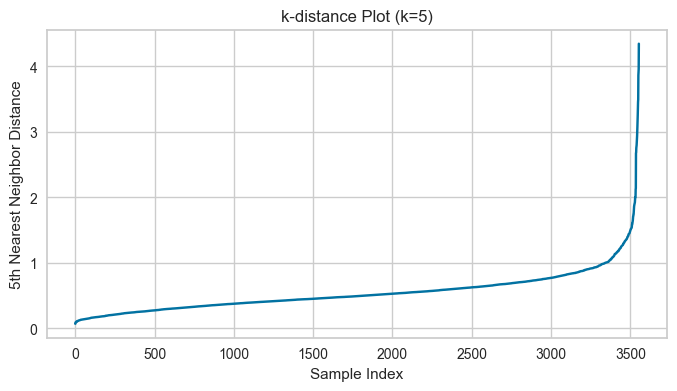

In [217]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 4~5개 이웃 기준 거리 측정 (min_samples와 일치시킴)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 거리 오름차순 정렬
distances = np.sort(distances[:, 4])  # 5번째 이웃 거리
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("k-distance Plot (k=5)")
plt.xlabel("Sample Index")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


In [220]:
from sklearn.cluster import DBSCAN

# eps는 k-distance plot 결과를 참고해서 설정
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 클러스터 결과 붙이기
X_cleaned['dbscan_cluster'] = labels


In [221]:
# 군집별 개수 확인
unique, counts = np.unique(labels, return_counts=True)
print("클러스터별 샘플 수:", dict(zip(unique, counts)))

# 노이즈는 label == -1
noise_count = np.sum(labels == -1)
print("노이즈 샘플 수:", noise_count)

# 원래 merged_df에 index 맞춰 클러스터 결과 넣기 (선택)
# merged_df.loc[X_cleaned.index, 'dbscan_cluster'] = labels


클러스터별 샘플 수: {np.int64(-1): np.int64(156), np.int64(0): np.int64(553), np.int64(1): np.int64(632), np.int64(2): np.int64(333), np.int64(3): np.int64(93), np.int64(4): np.int64(346), np.int64(5): np.int64(112), np.int64(6): np.int64(574), np.int64(7): np.int64(263), np.int64(8): np.int64(245), np.int64(9): np.int64(46), np.int64(10): np.int64(167), np.int64(11): np.int64(34)}
노이즈 샘플 수: 156


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)

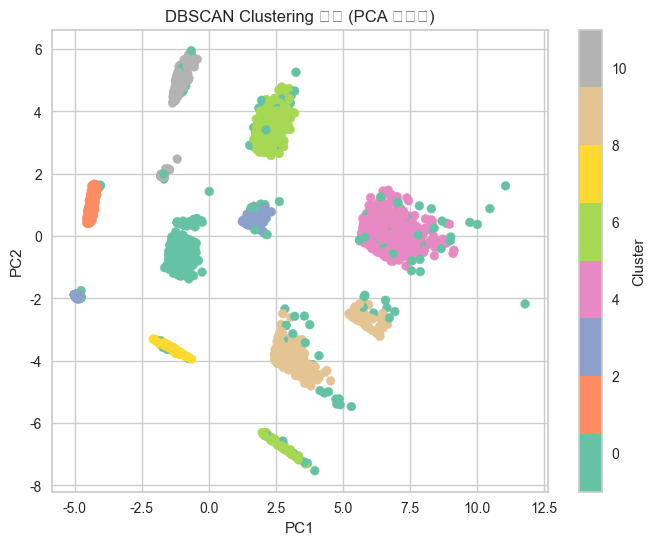

In [222]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2', s=40)
plt.title("DBSCAN Clustering 결과 (PCA 시각화)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


In [223]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# DBSCAN 결과에서 유효 클러스터만 평가 (노이즈 제외)
mask = labels != -1
X_valid = X_scaled[mask]
labels_valid = labels[mask]

# 실루엣 점수
sil_score = silhouette_score(X_valid, labels_valid)
print("Silhouette Score:", round(sil_score, 3))

Silhouette Score: 0.66


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [224]:

# Davies-Bouldin
db_index = davies_bouldin_score(X_valid, labels_valid)
print("Davies-Bouldin Index:", round(db_index, 3))

# 노이즈 비율
noise_ratio = np.sum(labels == -1) / len(labels)
print("노이즈 비율:", round(noise_ratio, 3))

Davies-Bouldin Index: 0.489
노이즈 비율: 0.044


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-package